In [1]:
import pandas as pd
from statsbombpy import sb

df = sb.events(match_id=3920396)

C:\Users\fredd\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


In [2]:
df.columns

Index(['50_50', 'ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_deflection', 'carry_end_location', 'clearance_aerial_won',
       'clearance_body_part', 'clearance_head', 'clearance_left_foot',
       'clearance_right_foot', 'counterpress', 'dribble_nutmeg',
       'dribble_outcome', 'dribble_overrun', 'duel_outcome', 'duel_type',
       'duration', 'foul_committed_card', 'foul_won_defensive',
       'goalkeeper_body_part', 'goalkeeper_end_location', 'goalkeeper_outcome',
       'goalkeeper_position', 'goalkeeper_shot_saved_off_target',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'injury_stoppage_in_chain', 'interception_outcome', 'location',
       'match_id', 'minute', 'off_camera', 'out', 'pass_aerial_won',
       'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
       'pass_cut_back', 'pass_deflected', 'pass_end_location',
       'pass_goal_assist', 'pass_height', 'pass_inswinging', 'pass_length',
       'pas

In [6]:
df = df[df['type'] == 'Shot']

df = df[['team', 'player', 'location', 'shot_outcome', 
         'shot_statsbomb_xg','shot_type']]

In [11]:
df.head()

,team,player,location,shot_outcome,shot_statsbomb_xg,shot_type,x,y
2915,Ghana,Mohammed Kudus,"[91.3, 30.1]",Saved Off Target,0.021753,Open Play,91.3,30.1
2916,Egypt,Emam Ashour Metwally Abdelghany,"[107.0, 23.2]",Saved,0.034904,Open Play,107.0,23.2
2917,Ghana,Mohammed Kudus,"[97.4, 34.4]",Goal,0.053337,Open Play,97.4,34.4
2918,Ghana,Mohammed Kudus,"[101.3, 35.0]",Off T,0.056939,Open Play,101.3,35.0
2919,Egypt,Omar Marmoush,"[104.4, 58.8]",Saved,0.009314,Open Play,104.4,58.8


In [8]:
df = df[df['shot_type'] != 'Penalty'] #remove shot that was a penalty

In [10]:
#separate location to x and y
df[['x', 'y']] = df['location'].apply(pd.Series)

Text(60, 74, 'Size represents xG')

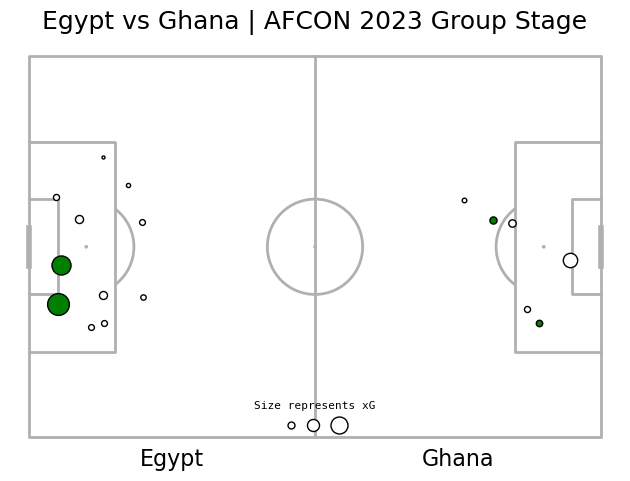

In [20]:
from mplsoccer import Pitch

pitch = Pitch(pitch_type='statsbomb')
fig, ax = pitch.draw()

for x in df.to_dict(orient='records'):
    if x['team'] == 'Egypt':
        pitch.scatter(x=120-x['x'], y=80-x['y'], ax=ax, s=500*x['shot_statsbomb_xg'],ec='black', c='green' if x['shot_outcome'] == 'Goal' else 'white')
    else:
         pitch.scatter(x=x['x'], y=x['y'], ax=ax, s=500*x['shot_statsbomb_xg'], ec='black', c='green' if x['shot_outcome'] == 'Goal' else 'white')
            
ax.set_title('Egypt vs Ghana | AFCON 2023 Group Stage', fontsize=18)
ax.text(30, 86, 'Egypt', ha='center', fontsize=16)
ax.text(90, 86, 'Ghana', ha='center', fontsize=16)

# Lets also add a legend for the size of the shots in the bottom middle of the pitch
pitch.scatter(55, 77.5, s=500*.05, ec='black', c='white', ax=ax)
pitch.scatter(59.5, 77.5, s=500*.15, ec='black', c='white', ax=ax)
pitch.scatter(65, 77.5, s=500*.3, ec='black', c='white', ax=ax)

# We can add a label for the legend
ax.text(60, 74, 'Size represents xG', ha='center', fontsize=8, fontfamily='monospace')